In [43]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LassoLarsCV,Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor

# Modelling Helpers
# Modelling Helpers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer, scale, OneHotEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline

In [44]:
traindf = pd.read_csv(r"C:\Users\soumy\Downloads\house-prices-advanced-regression-techniques\train.csv")
testdf = pd.read_csv(r"C:\Users\soumy\Downloads\house-prices-advanced-regression-techniques\test.csv")

In [45]:
# create a single dataframe of both the training and testing data
wholedf = pd.concat([traindf,testdf])

In [46]:
wholedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [47]:
wholedf.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


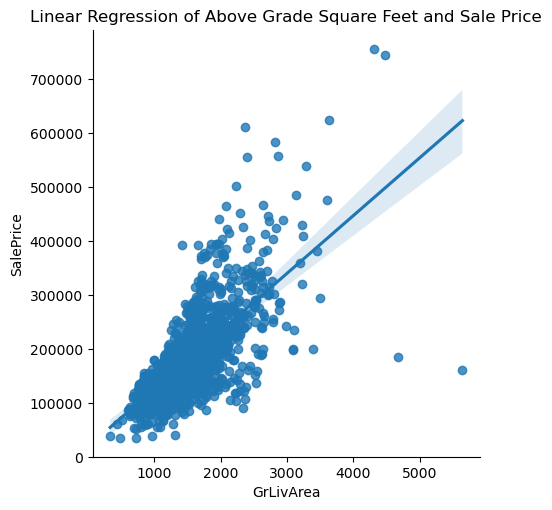

In [48]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=wholedf);
plt.title("Linear Regression of Above Grade Square Feet and Sale Price")
plt.ylim(0,)
plt.show()

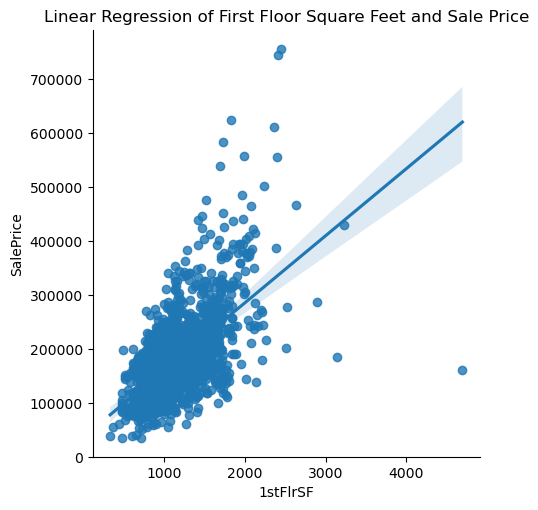

In [49]:
sns.lmplot(x="1stFlrSF", y="SalePrice", data=wholedf);
plt.title("Linear Regression of First Floor Square Feet and Sale Price")
plt.ylim(0,)
plt.show()

In [51]:
# Make sure 'SalePrice' is still in your DataFrame
# If you removed it earlier, reload the data or add it back before running this
train = pd.read_csv(r"C:\Users\soumy\Downloads\house-prices-advanced-regression-techniques\train.csv")

# Compute correlation with SalePrice
traincorr = train.corr(numeric_only=True)['SalePrice']

# Convert Series to DataFrame
traincorr = pd.DataFrame(traincorr)

# Rename column from SalePrice to Correlation
traincorr.columns = ["Correlation"]

# Sort by correlation
traincorr_sorted = traincorr.sort_values(by='Correlation', ascending=False)

# Display top 15 correlated features
print(traincorr_sorted.head(15))


              Correlation
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420


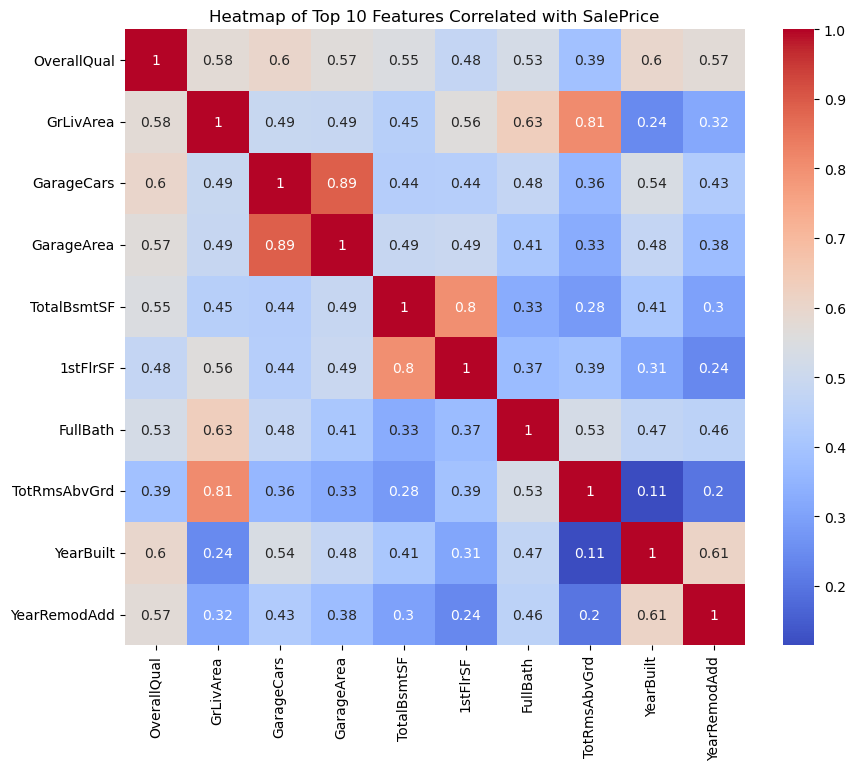

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure wholedf exists and is your combined DataFrame
# Compute correlation matrix for numeric columns only
corr = wholedf.select_dtypes(include=[np.number]).corr()

# Now you can get correlation of features with SalePrice
saleprice_corr = corr['SalePrice'].sort_values(ascending=False)

# Select top 10 correlated features excluding SalePrice itself
top_features = saleprice_corr[1:11].index

# Plot heatmap for top features
plt.figure(figsize=(10, 8))
sns.heatmap(wholedf[top_features].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Top 10 Features Correlated with SalePrice")
plt.show()


In [58]:
countmissing = wholedf.isnull().sum().sort_values(ascending=False)
percentmissing = (wholedf.isnull().sum()/wholedf.isnull().count()).sort_values(ascending=False)
wholena = pd.concat([countmissing,percentmissing], axis=1)
wholena.head(36)

,0,1
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
MasVnrType,1766,0.605002
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageYrBlt,159,0.054471
GarageQual,159,0.054471


In [57]:
#wholedf[["Utilities", "Id"]].groupby(['Utilities'], as_index=False).count()
wholedf['Utilities'] = wholedf['Utilities'].fillna("AllPub")

# wholedf[["Electrical", "Id"]].groupby(['Electrical'], as_index=False).count()
wholedf['Electrical'] = wholedf['Electrical'].fillna("SBrkr")

# wholedf[["Exterior1st", "Id"]].groupby(['Exterior1st'], as_index=False).count()
wholedf['Exterior1st'] = wholedf['Exterior1st'].fillna("VinylSd")

#wholedf[["Exterior2nd", "Id"]].groupby(['Exterior2nd'], as_index=False).count()
wholedf['Exterior2nd'] = wholedf['Exterior2nd'].fillna("VinylSd")

In [59]:
# Missing interger values replace with the median in order to return an integer
wholedf['BsmtFullBath']= wholedf.BsmtFullBath.fillna(wholedf.BsmtFullBath.median())
wholedf['BsmtHalfBath']= wholedf.BsmtHalfBath.fillna(wholedf.BsmtHalfBath.median())
wholedf['GarageCars']= wholedf.GarageCars.fillna(wholedf.GarageCars.median())

# Missing float values were replaced with the mean for accuracy 
wholedf['BsmtUnfSF']= wholedf.BsmtUnfSF.fillna(wholedf.BsmtUnfSF.mean())
wholedf['BsmtFinSF2']= wholedf.BsmtFinSF2.fillna(wholedf.BsmtFinSF2.mean())
wholedf['BsmtFinSF1']= wholedf.BsmtFinSF1.fillna(wholedf.BsmtFinSF1.mean())
wholedf['GarageArea']= wholedf.GarageArea.fillna(wholedf.GarageArea.mean())
wholedf['MasVnrArea']= wholedf.MasVnrArea.fillna(wholedf.MasVnrArea.mean())

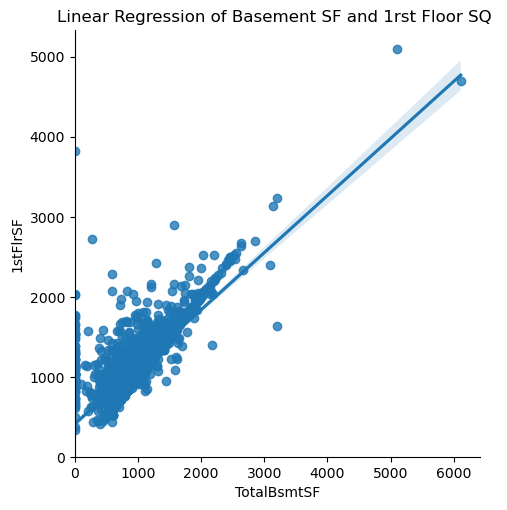

In [60]:
wholedf.GarageYrBlt.fillna(wholedf.YearBuilt, inplace=True)
wholedf.TotalBsmtSF.fillna(wholedf['1stFlrSF'], inplace=True)

sns.lmplot(x="TotalBsmtSF", y="1stFlrSF", data=wholedf)
plt.title("Linear Regression of Basement SF and 1rst Floor SQ ")
plt.xlim(0,)
plt.ylim(0,)
plt.show()

In [61]:
lot = wholedf[['LotArea','LotConfig','LotFrontage','LotShape']]
lot = pd.get_dummies(lot)
lot.corr()['LotFrontage']

LotArea              0.489896
LotFrontage          1.000000
LotConfig_Corner     0.257028
LotConfig_CulDSac   -0.104612
LotConfig_FR2       -0.056992
LotConfig_FR3        0.027509
LotConfig_Inside    -0.162484
LotShape_IR1         0.151502
LotShape_IR2        -0.011356
LotShape_IR3         0.139550
LotShape_Reg        -0.164639
Name: LotFrontage, dtype: float64

In [62]:
lot["LotAreaUnSq"] = np.sqrt(lot['LotArea'])

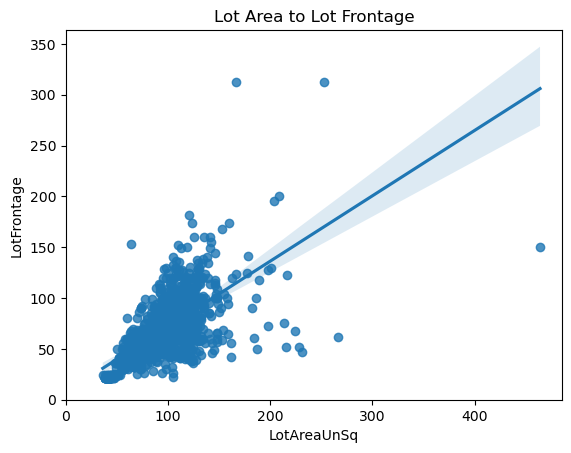

In [63]:
sns.regplot(x="LotAreaUnSq", y="LotFrontage", data=lot);
plt.xlim(0,)
plt.ylim(0,)
plt.title("Lot Area to Lot Frontage")
plt.show()

In [64]:
# Remove all lotfrontage is missing values
lot = lot[lot['LotFrontage'].notnull()]
# See the not null values of LotFrontage
lot.describe()['LotFrontage']

count    2433.000000
mean       69.305795
std        23.344905
min        21.000000
25%        59.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [65]:
wholedf['LotFrontage']= wholedf.LotFrontage.fillna(np.sqrt(wholedf.LotArea))
wholedf['LotFrontage']= wholedf['LotFrontage'].astype(int)


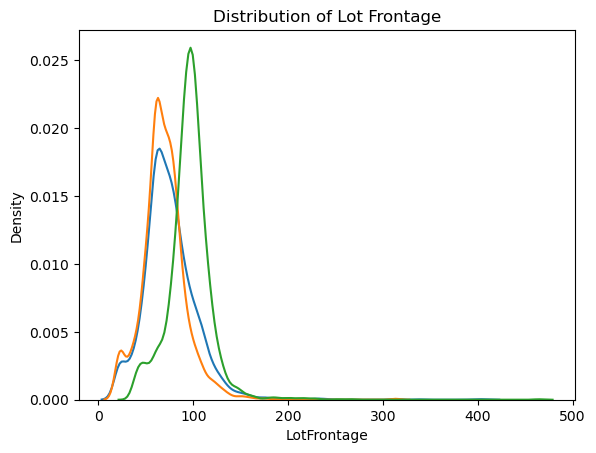

In [66]:
# Distribution of values after replacement of missing frontage
sns.kdeplot(wholedf['LotFrontage']);
sns.kdeplot(lot['LotFrontage']);
sns.kdeplot(lot['LotAreaUnSq']);
plt.title("Distribution of Lot Frontage")
plt.show()

In [67]:
countmissing = wholedf.isnull().sum().sort_values(ascending=False)
percentmissing = (wholedf.isnull().sum()/wholedf.isnull().count()).sort_values(ascending=False)
wholena = pd.concat([countmissing,percentmissing], axis=1)
wholena.head(3)

,0,1
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169


In [68]:
Livingtotalsq = wholedf['TotalBsmtSF'] + wholedf['1stFlrSF'] + wholedf['2ndFlrSF'] + wholedf['GarageArea'] + wholedf['WoodDeckSF'] + wholedf['OpenPorchSF']
wholedf['LivingTotalSF'] = Livingtotalsq

# Total Living Area divided by LotArea
wholedf['PercentSQtoLot'] = wholedf['LivingTotalSF'] / wholedf['LotArea']

# Total count of all bathrooms including full and half through the entire building
wholedf['TotalBaths'] = wholedf['BsmtFullBath'] + wholedf['BsmtHalfBath'] + wholedf['HalfBath'] + wholedf['FullBath']

# Percentage of total rooms are bedrooms
wholedf['PercentBedrmtoRooms'] = wholedf['BedroomAbvGr'] / wholedf['TotRmsAbvGrd']

# Number of years since last remodel, if there never was one it would be since it was built
wholedf['YearSinceRemodel'] = 2016 - ((wholedf['YearRemodAdd'] - wholedf['YearBuilt']) + wholedf['YearBuilt'])

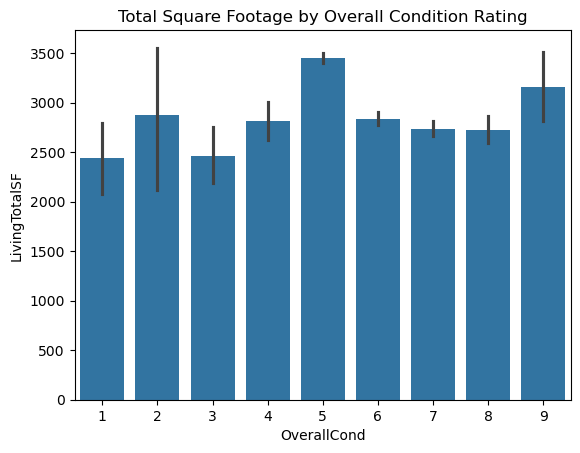

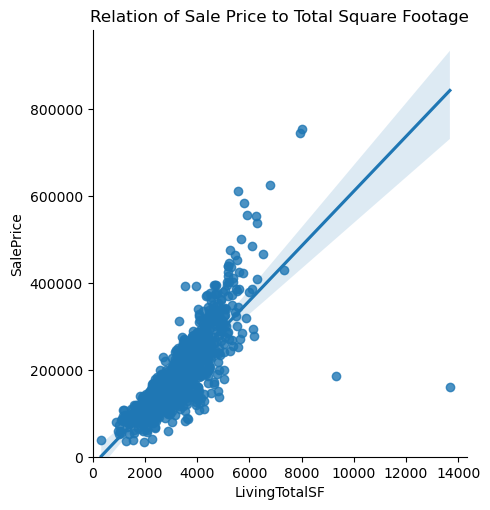

In [69]:
sns.barplot(x="OverallCond", y="LivingTotalSF", data=wholedf)
plt.title("Total Square Footage by Overall Condition Rating")
plt.show()

sns.lmplot(x="LivingTotalSF", y="SalePrice", data=wholedf)
plt.title("Relation of Sale Price to Total Square Footage")
plt.xlim(0,)
plt.ylim(0,)
plt.show()

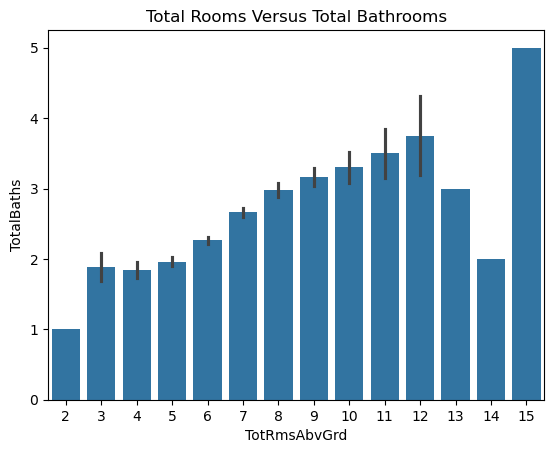

In [70]:
ax = sns.barplot(x="TotRmsAbvGrd", y="TotalBaths",data=wholedf)
plt.title("Total Rooms Versus Total Bathrooms")
plt.show()

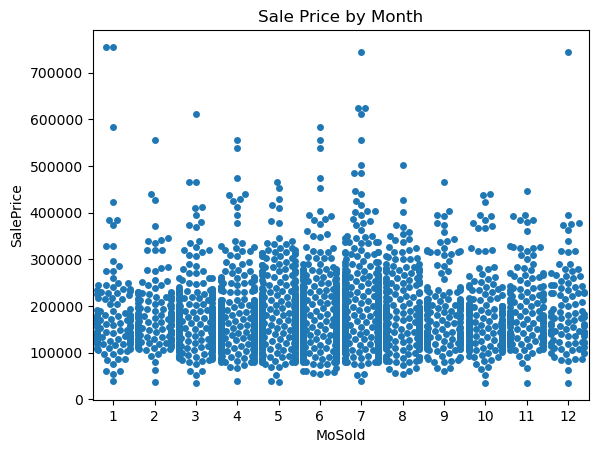

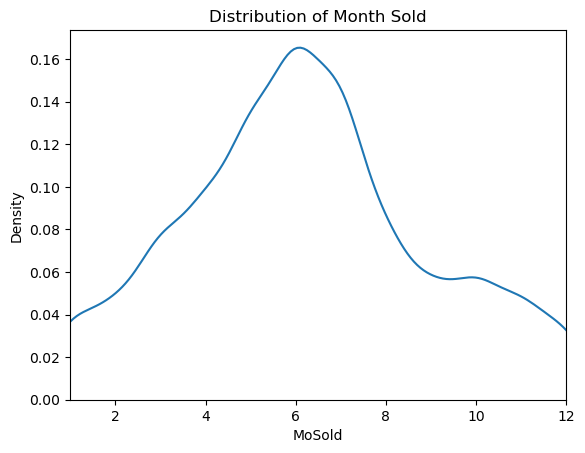

In [71]:
sns.swarmplot(x="MoSold", y="SalePrice", data=wholedf)
plt.title("Sale Price by Month")
plt.show()

sns.kdeplot(wholedf['MoSold']);
plt.title("Distribution of Month Sold")
plt.xlim(1,12)
plt.show()

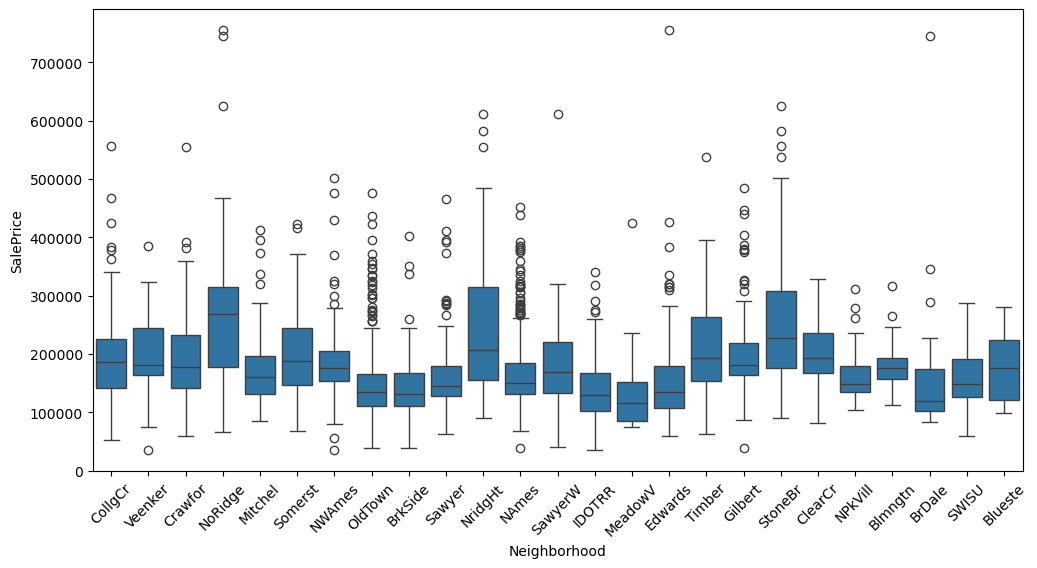

In [72]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = wholedf)
plt.xticks(rotation=45)
plt.show()

In [81]:
# Assuming you're using the original train and test data
train = pd.read_csv(r"C:\Users\soumy\Downloads\house-prices-advanced-regression-techniques\train.csv")
test = pd.read_csv(r"C:\Users\soumy\Downloads\house-prices-advanced-regression-techniques\test.csv")

# Save target
y = train['SalePrice']

# Drop ID and target
train.drop(['Id', 'SalePrice'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

# Combine for consistent encoding
all_data = pd.concat([train, test], axis=0)

# Fill missing values
for col in all_data.columns:
    if all_data[col].dtype == "object":
        all_data[col] = all_data[col].fillna(all_data[col].mode()[0])
    else:
        all_data[col] = all_data[col].fillna(all_data[col].median())

# Add TotalSF feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# Encode categorical features
all_data = pd.get_dummies(all_data)

# Split back into train and test
train_X = all_data[:len(y)]
test_X = all_data[len(y):]


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

# Split data
train_X_split, valid_X, train_y_split, valid_y = train_test_split(train_X, y, train_size=0.7, random_state=42)

# Train model
model = Ridge(alpha=10)
model.fit(train_X_split, train_y_split)

# Evaluate model
print("Train Score:", model.score(train_X_split, train_y_split))
print("Validation Score:", model.score(valid_X, valid_y))


Train Score: 0.8993834475393565
Validation Score: 0.8750251758421349


In [84]:
# Ensure test_ID is saved before dropping 'Id'
test_ID = pd.read_csv(r"C:\Users\soumy\Downloads\house-prices-advanced-regression-techniques\test.csv")['Id']

# Predict using trained model
result = model.predict(test_X)

# Create output DataFrame
output = pd.DataFrame({'Id': test_ID, 'SalePrice': result})

# Save to CSV
output.to_csv("solution.csv", index=False)

# Preview
print(output.head(10))



     Id      SalePrice
0  1461  102964.616549
1  1462  128867.552988
2  1463  167911.566809
3  1464  188346.686354
4  1465  213496.487216
5  1466  171513.358233
6  1467  180569.146861
7  1468  155655.960359
8  1469  210472.848778
9  1470  112507.941286


Conclusion
There were a couple of models tried. Random Forest Regression, LassoLarsCV and Ridge were all options and after experimenting I ended up settling on Ridge as the better option. What was fascinating and frustrating was the wide variation in accuracy each time I ran it. The models all seem to have some fluctuation in them. In the end I had about a 82%–90% accuracy. In trying to apply this same process to Burlington’s housing data I ran into even stranger inconsistency and huge over fitting problems. I have a feeling this will be a work in progress as I try it on other data sets.